<a href="https://colab.research.google.com/github/23ft/Digital-Modulation-Python/blob/main/8PSK_modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**8PSK - PYTHON [23FT]**

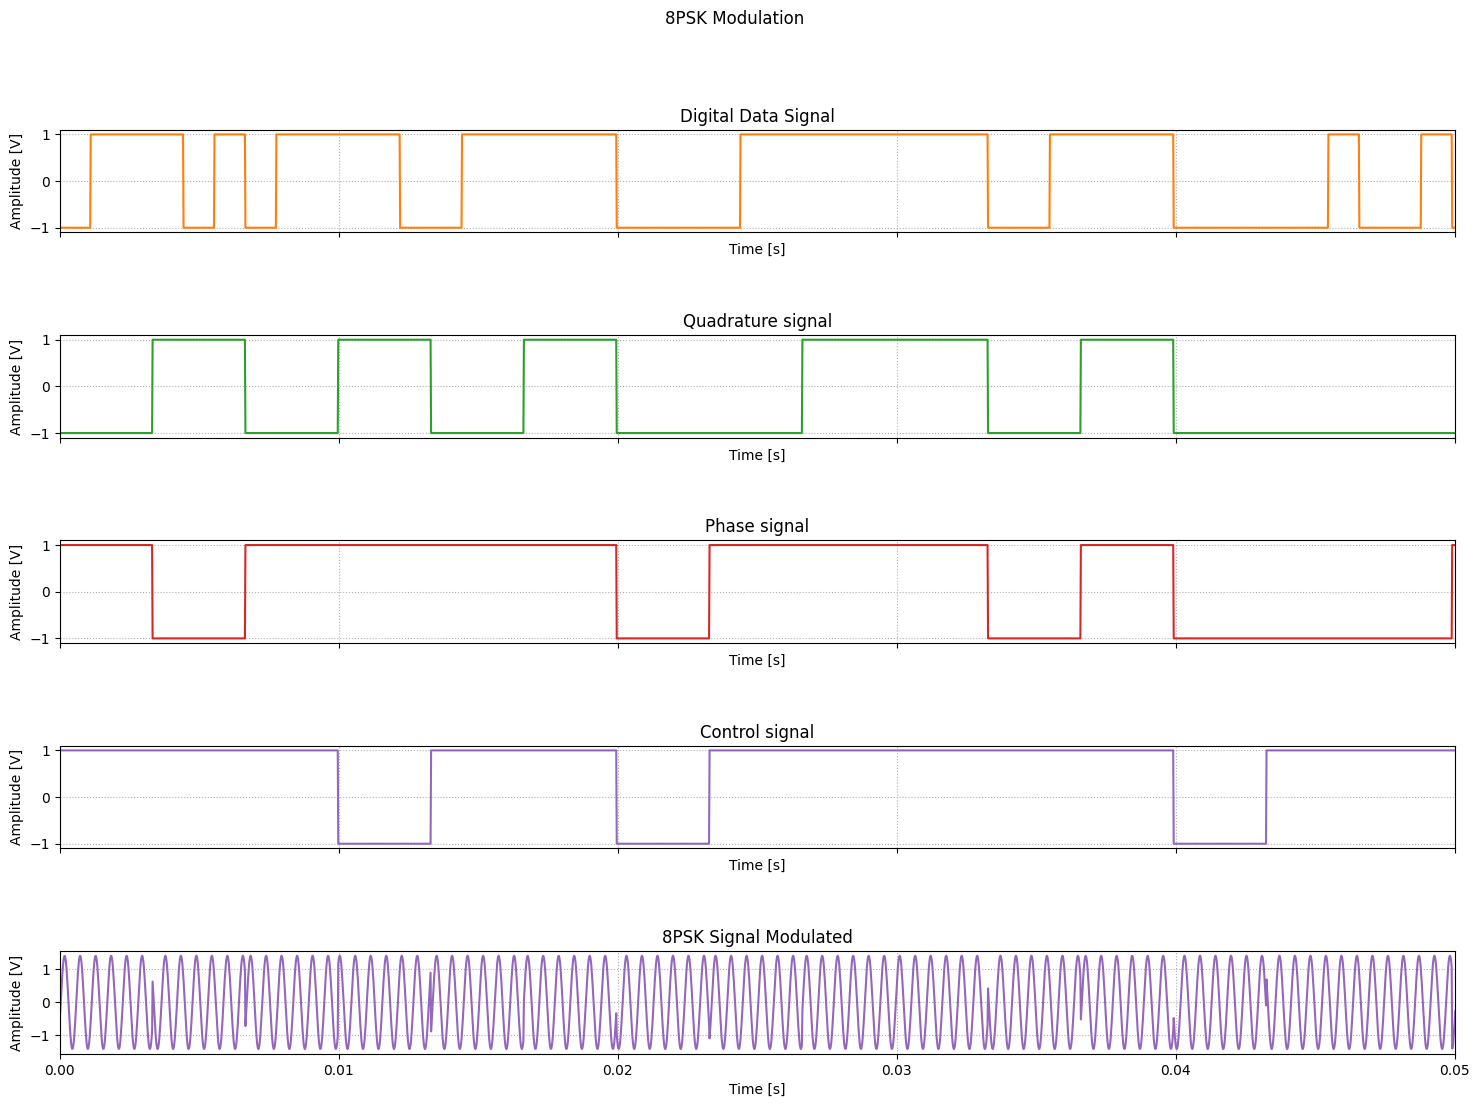

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sys
import math
from numpy import pi, sqrt, sin, cos, zeros, r_

""" Configuracion """
fs = 54100                  # sampling rate - samples/sec - puls/sec
baud = 900                  # symbol rate - bits/sec
Nbits = 60                  # number of bits
f0 = 1800                   # carrier Frequency
Ns = int(fs/baud)           # number of Samples per Symbol - samples/bit
N = Nbits * Ns              # Total Number of Samples
t = r_[0.0:N]/fs            # time points

# Rango para bits y tiempo para visualizacion 
symbolsToShow = 45
timeDomainVisibleLimit = np.minimum(Nbits/baud,symbolsToShow/baud)  

inputBits = np.random.randn(Nbits,1) > 0 
inputSignal = (np.tile(inputBits*2-1,(1,Ns))).ravel()

#divisor de bits
if (inputBits.size%3 == 0):
  

  Q_bits = inputBits[::3]
  I_bits = inputBits[1::3]
  C_bits = inputBits[2::3]

  Q_signal = (np.tile(Q_bits*2-1,(1,3*Ns))).ravel()
  I_signal = (np.tile(I_bits*2-1,(1,3*Ns))).ravel()
  C_signal = (np.tile(C_bits*2-1,(1,3*Ns))).ravel()

  """ cambiador de 2 a 4 niveles """

  bits_data = [Q_bits, I_bits, C_bits, np.invert(C_bits)]
  q_modu = np.zeros(shape=1)
  i_modu = np.zeros(shape=1)
  result = 0.0

  """ Modulador de producto. """

  for x in range(0,int(Nbits/3), 1):
    # garantizando indexar array <t> en base a el Ns (samples/bit)
    if x == 0:
      t_inf = 0
      t_sup = Ns*3
    else:
      t_inf = t_sup
      t_sup = t_inf + (Ns*3)
    
    """ Q_bits """
    if Q_bits[x]:
      # signo positivo
      if bits_data[3][x]: # 1.307 volts
        q_modu = np.concatenate( (q_modu, 1.307*cos(2*pi*f0*t[t_inf:t_sup])) )

      else: # 0.541 volts
        q_modu = np.concatenate( (q_modu, 0.541*cos(2*pi*f0*t[t_inf:t_sup])) )

    else:
      # signo negativo
      if bits_data[3][x]: # 1.307 volts
        q_modu = np.concatenate( (q_modu, (-1.307)*cos(2*pi*f0*t[t_inf:t_sup])) )

      else: # 0.541 volts
        q_modu = np.concatenate( (q_modu, (-0.541)*cos(2*pi*f0*t[t_inf:t_sup])) )

    """ I_bits """
    if I_bits[x]:
      # signo positivo

      if bits_data[2][x]: # 1.307 volts
        i_modu = np.concatenate( (i_modu,1.307*sin(2*pi*f0*t[t_inf:t_sup])) ) 

      else: # 0.541 volts
        i_modu = np.concatenate( (i_modu,0.541*sin(2*pi*f0*t[t_inf:t_sup])) )

    else:
      # signo negativo
      if bits_data[2][x]: # 1.307 volts
        i_modu = np.concatenate( (i_modu,(-1.307)*sin(2*pi*f0*t[t_inf:t_sup])) ) 

      else: # 0.541 volts
        i_modu = np.concatenate( (i_modu,(-0.541)*sin(2*pi*f0*t[t_inf:t_sup])) )
    
  """ Graficacion Q-I-C """

  fig, axis = plt.subplots(5,1,sharex='col')
  fig.suptitle('8PSK Modulation', fontsize=12)

  axis[0].plot(t, inputSignal, color='C1')
  #axis[0].set_title('Digital Data Signal (Source Code/ Block Diagram: "inputBits")')
  axis[0].set_title('Digital Data Signal')
  axis[0].set_xlabel('Time [s]')
  axis[0].set_ylabel('Amplitude [V]')
  axis[0].set_xlim(0,timeDomainVisibleLimit)
  axis[0].grid(linestyle='dotted')

  axis[1].plot(t, Q_signal, color='C2')
  #axis[0].set_title('Digital Data Signal (Source Code/ Block Diagram: "inputBits")')
  axis[1].set_title('Quadrature signal')
  axis[1].set_xlabel('Time [s]')
  axis[1].set_ylabel('Amplitude [V]')
  axis[1].set_xlim(0,timeDomainVisibleLimit)
  axis[1].grid(linestyle='dotted')

  axis[2].plot(t, I_signal, color='C3')
  #axis[0].set_title('Digital Data Signal (Source Code/ Block Diagram: "inputBits")')
  axis[2].set_title('Phase signal')
  axis[2].set_xlabel('Time [s]')
  axis[2].set_ylabel('Amplitude [V]')
  axis[2].set_xlim(0,timeDomainVisibleLimit)
  axis[2].grid(linestyle='dotted')


  axis[3].plot(t, C_signal, color='C4')
  #axis[0].set_title('Digital Data Signal (Source Code/ Block Diagram: "inputBits")')
  axis[3].set_title('Control signal')
  axis[3].set_xlabel('Time [s]')
  axis[3].set_ylabel('Amplitude [V]')
  axis[3].set_xlim(0,timeDomainVisibleLimit)
  axis[3].grid(linestyle='dotted')

  axis[4].plot(t, i_modu[1::] + q_modu[1::] , color='C4')
  #axis[5].set_title('QPSK Signal Modulated (Source Code/ Block Diagram: "QPSK_signal")')
  axis[4].set_title('8PSK Signal Modulated')
  axis[4].set_xlabel('Time [s]')
  axis[4].set_xlim(0,timeDomainVisibleLimit)
  axis[4].set_ylabel('Amplitude [V]')
  axis[4].grid(linestyle='dotted')    

  plt.rcParams['figure.figsize'] = [18, 12]
  plt.subplots_adjust(hspace=1)
  plt.show()


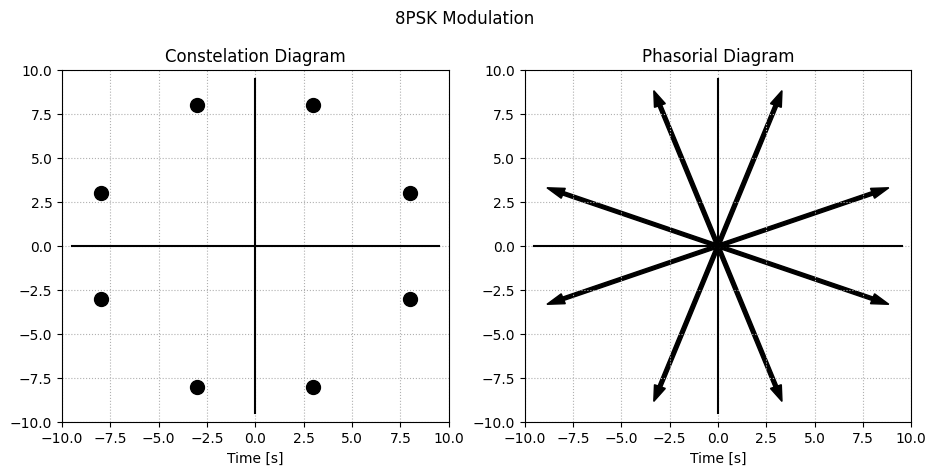

In [6]:
# 8PSK

from matplotlib import pyplot as plt
import numpy as np

plt.rcParams["figure.autolayout"] = True

x_values = [-9.5,-1,1,9.5]
y_values = [0]*4
points = [[8,3],
          [-8,-3],
          [-8,3],
          [8,-3],
          [3,8],
          [-3,8],
          [-3,-8],
          [3,-8]]

fig, axis = plt.subplots(1,2,sharex='col')
fig.suptitle('8PSK Modulation', fontsize=12)

axis[0].set_title('Constelation Diagram')
axis[0].set_xlabel('Time [s]')
axis[0].set_xlim(-10, 10)
axis[0].set_ylim(-10, 10)    
axis[0].grid(linestyle='dotted')

for x in range(0,len(points),1):
  axis[0].plot(points[x][0],points[x][1], marker="o", markersize=10, color="black")

axis[0].plot(x_values,y_values, color="black")
axis[0].plot(y_values,x_values, color="black")

# Phasorial Diagram
axis[1].set_title('Phasorial Diagram')
axis[1].set_xlabel('Time [s]')
axis[1].grid(linestyle='dotted')
axis[1].set_xlim(-10, 10)
axis[1].set_ylim(-10, 10)

for x in range(0,len(points),1):
  axis[1].arrow(0,0,points[x][0],points[x][1],width=0.2,color="black")

axis[1].plot(x_values,y_values, color="black")
axis[1].plot(y_values,x_values, color="black")

plt.rcParams['figure.figsize'] = [6.4 + 3, 4.8]


plt.show()